The notebook is used to do event detect. From the mobility of the 6 years, the 01/02/2014 has a peak of mobility. It's necessary to find the reason of the phenomenon. We use hashtag in 'text' to detect the event. We extract the hashtag in text which start with '#' and end with space. In 01/02/2014, we count the frequency of hashtag in different hours. Finally we draw the wordcloud.

In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pickle
import os

In [7]:
with open("modified_twex_second_5000000.tsv", 'r') as h:
    lines_modified = h.readlines()

In [9]:
line=lines_modified

subtract  tag

In [10]:
for j in range(len(lines_modified)):
    line[j]=lines_modified[j].split('\t')
    text_line=line[j][3].split(' ')
    line[j][3]=[]
    tag=[]
    for i in range(len(text_line)):
        if(text_line[i].startswith('#')==True):
            tag.append(text_line[i])
            line[j][3]=tag

In [ ]:
df_3=pd.DataFrame(line,columns=schema[1])

In [ ]:
df_3_col = df_3[df_3.placeId != '\\N'][['userId', 'createdAt','placeId','placeLatitude', 'placeLongitude',
                                    'text']]
df_3_col_time = df_3_col[df_3_col.createdAt!='0000-00-00 00:00:00']

In [7]:
with open('data/twitter-swisscom/twitter_text_hashtag_2.pickle','rb') as t:
    df_3_col_time=pickle.load(t)

In [39]:
df_3_create=df_3_col_time.set_index('createdAt')
df_3_create=df_3_create[['text']]
time_create=time.set_index('createdAt')
time_create=time_create[['year','placeId','']]
create_list=[df_3_create,time_create]
create_tag=pd.concat(create_list,axis=1,join='outer')

In [ ]:
create_tag_thatday=create_tag[(create_tag.year==2014) & (create_tag.month == 1) & (create_tag.day ==1)]

In [41]:
create_tag=create_tag_thatday.reset_index()

In [43]:
create_tag=create_tag[['placeId','hour','text']]

In [163]:
create_tag.head()

1,placeId,hour,text
0,01f8d411ccaff471,0,[]
1,aa82f9097ca33c34,0,[]
2,24292aa21cb92cd8,0,[]
3,63ac62026ca4b545,0,[]
4,c3a6437e1b1a726d,0,[]


In [111]:
create_tag_1=create_tag[create_tag.text.astype(str)!='[]']

In [119]:
create_tag_count=create_tag.groupby(['placeId','hour']).apply(lambda x: x.sum())

In [122]:
create_tag_count_1=create_tag_count[['text']]

In [124]:
create_tag_count_2=create_tag_count_1[create_tag_count_1.text.astype(str)!='[]']

In [137]:
from collections import OrderedDict

use  dictionary  to store the result of count

In [152]:
tag_dic_list=[]
for i in range(create_tag_count_2.shape[0]):
    text_line=create_tag_count_2['text'].ix[i]
    d = {x:text_line.count(x) for x in text_line}
    d_sorted_by_value = OrderedDict(sorted(d.items(), key=lambda x: x[1],reverse=True))
    tag_dic_list.append(d_sorted_by_value)

In [155]:
create_tag_count_2['tag_freq']=tag_dic_list

/Users/lcav/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [158]:
create_tag_count_2

1                                                                   text  \
placeId          hour                                                      
007355fb62ccfa7b 10                                        [#sapevamolo]   
00db800fad3e5eed 18    [#coppi, #neve, #snow, #ghisallo, #madonnaselg...   
0110adcf67b7cd1e 8        [#BonneAnneeNabilla, #JaiHonteMaisJavoue, #rt]   
                 15    [#skiing, #cloudy, #offpiste, #photoaday, #day...   
                 19    [#montblanc, #saintgervais, #chamonix, #leshou...   
                 20                                           [#lt, #lt]   
016897347bc6767a 13                                         [#Macugnaga]   
017f355b6d0d683f 13                                         [#corvatsch]   
                 21    [#relaxing, #sun, #beautiful, #days, #mountain...   
01f8d411ccaff471 6                                      [#n, #e, #r, #d]   
                 11                                         [#emotional]   
                 15                                [#poorpersonproblems]   
                 16                                         [#TPG, #Act]   
                 18                             [#switzerland,, #London]   
                 23                                               [#LRT]   
02760c9beb0c2a91 16                                        [#wewantphil]   
                 21    [#goloso, #caffè, #duespade, #campodolcino, #2...   
02e5e691d74c13e3 2                                                [#off]   
                 12             [#HalaMadrid, #PetiteCoincidence, #medo]   
0323f23d874e7197 20                     [#nsnon, #nsnon, #nsoui, #nsnon]   
                 21                             [#nsoui, #nsnon, #nsoui]   
0391c91d9d088672 14    [#newyearrocks, #crazyshit, #amazing, #newyear...   
                 15    [#newyearrocks, #newyearrocks, #newyearrocks, ...   
                 16    [#CSRRacing, #newyearrocks, #newyearrocks, #ne...   
                 17    [#lol, #newyearrocks, #newyearrocks, #newyearr...   
                 18    [#newyearrocks, #newyearrocks, #newyearrocks, ...   
                 19    [#justloveit, #blondie, #rock, #dancing, #Cusc...   
                 20    [#newyearrocks, #newyearrocks, #newyearrocks, ...   
                 23                                        [#justloveit]   
039eb34ec9c158a1 21                             [#alepagani, #alepagani]   
...                                                                  ...   
fc58a3476b706856 15    [#newyearrocks, #newyearrocks, #Gamecocks, #ne...   
                 16    [#newyearrocks, #BrotherSisterLove, #newyearro...   
                 17    [#GreatDay, #newyearrocks, #newyearrocks, #wow...   
                 18    [#newyearrocks, #newyearrocks, #newyearrocks, ...   
                 19    [#newyearrocks, #newyearrocks, #newyearrocks, ...   
                 20    [#newyearrocks, #newyearrocks, #SherlockLives,...   
                 22                                        [#justloveit]   
fc8509fd46983b3d 14                                                [#lt]   
                 23                                                [#lt]   
fce5b4c4f721931c 15                                    [#sport, #tennis]   
fd8e96cf89ed2fc2 10                                      [#Bilalİfadeye]   
                 13                   [#adamgibiadamorçunünlüyineyazmış]   
fdb7b3dd14787825 9                                            [#painnnn]   
                 12                    [#needanap, #exhausted, #oldlady]   
                 13       [#beattheboredom, #legsofsteel, #icantbreathe]   
                 22                                        [#dontmindme]   
fdb8b13745d79424 14                     [#nw, #AllezCriCriEcraseGrosNez]   
                 15         [#tricheurs, #tardbâ, #Juve, #Roma, #SerieA]   
                 16                               [#sixseasonsandamovie]   
ff5fdeb94c7b880d 13                        [#SUA

In [159]:
with open('data/twitter-swisscom/twitter_tag_20140102.pickle','wb') as t:
    pickle.dump(create_tag_count_2,t)

#  word  cloud

In [164]:
from os import path
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import nltk
from scipy.stats import itemfreq
import pycountry
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
def plot_word_cloud(wordcloud):
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [166]:
all_body_text = (create_tag_count_2.loc[:, 'text'].dropna()).sum()

In [173]:
tag_text = ''.join(all_body_text) 

'#sapevamolo#coppi#neve#snow#ghisallo#madonnaselghisallo#faustocoppi…#BonneAnneeNabilla#JaiHonteMaisJavoue#rt#skiing#cloudy#offpiste#photoaday#day2#beginswithg#geisha#montblanc#saintgervais#chamonix#leshouches#LRT#bonne#lt#lt#Macugnaga#corvatsch#relaxing#sun#beautiful#days#mountain#snow#sunny…#n#e#r#d#emotional#poorpersonproblems#TPG#Act#switzerland,#London#LRT#wewantphil#goloso#caffè#duespade#campodolcino#2013#off#HalaMadrid#PetiteCoincidence#medo#nsnon#nsnon#nsoui#nsnon#nsoui#nsnon#nsoui#newyearrocks#crazyshit#amazing#newyearrocks#shitTaylorsays#newyearrocks#newyearrocks#newyearrocks#foodcoma#newyearrocks#newyearrocks#newyearrocks#newyearrocks#newyearrocks#newyearrocks#helpo#newyearrocks#newyearrocks#newyearrocks#newyearrocks#newyearrocks#newyearrocks#newyearrocks#newyearrocks#newyearrocks#newyearrocks#newyearrocks#newyearrocks#newyearrocks#newyearrocks#newyearrocks#newyearrocks#newyearrocks#newyearrocks#hgtvnewyear#hgtvroseparade#newyearrocks#newyearrocks#newyearrocks#newyearrocks#n

In [174]:
tag_text_1=str.replace(tag_text,'#',' ')

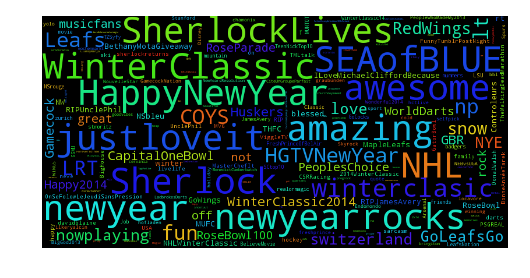

In [175]:
wordcloud = WordCloud(max_font_size=60, width=800, height=400)
wordcloud.stopwords = {}
wordcloud = wordcloud.generate(tag_text_1)
plot_word_cloud(wordcloud)